This notebook describes the data from the **Recommendations with IBM** materials.
<br>
It concerns the use of the platform `to_complete` by its users.
<br>

In the following we'll define the _activities_ or _interactions_ every interaction of a user with an article.
<br>
This means that if a user reads the articles with ids 5, 12, 104 respectively 2, 3 and 1 times, the number of activities of the user is 2 + 3 + 1 = 6.
<br>

On the other hand, we'll define _readings_ as the number of unique article read.
Taking into account the previous example, the number of reading will be 3.

In [3]:
import sys
sys.path.append('E:\personal')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')

from recommendations_with_IBM.analysis import users as pu
from recommendations_with_IBM.read_data import reader

fig_args = {'figsize': (18, 6),
           'new_figure': 1}

# Loading data
in this section we load the data in a pandas.DataFrame and clean them.
<br>
Original data has columns ```['article_id', 'title', 'email']``` with some NaN value for the 'email' field.
<br>
We clean the NaN value and then assign to each email a integer 'user_id' for simplification.

In [4]:
u = reader.UserList()
df = u.df
df.head()

,article_id,title,email,user_id
0,1430,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7,3838
1,1314,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b,2770
2,1429,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074,834
3,1338,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7,3569
4,1276,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2,3345


In [8]:
n_entries, _ = df.shape
print(f'Number of entries: \t {n_entries}')
n_user = len(df.user_id.unique())
print(f'Number of users:\t {n_user}')

Number of entries: 	 45976
Number of users:	 5148


# I. Explanatory Data Analysis
Before making recommendations of any kind, you will need to explore the data you are working with for the project.
Dive in to see what you can find.
There are some basic, required questions to be answered about the data you are working with throughout the rest of the
notebook. Use this space to explore, before you dive into the details of your recommendation system in the later
sections.

## Interactions per user
We have many users but most of them have really few interactions, as shown in the next output and in the following figure.

In [63]:
df_description = df.groupby('user_id').title.count().describe()
# print(df_description)
q3 = df_description.loc['75%']
q1 = df_description.loc['25%']
IQR = q3 - q1
out_top = q3 + 1.5 * IQR
out_bottom = q1 - 1.5 * IQR
n_outliers = (df.groupby('user_id').title.count() > out_top).sum()

df_description.loc[''] = ''
df_description.loc['IQR'] = IQR
df_description.loc['Top outlier'] = out_top
df_description.loc["Bottom outlier"] = max(0, out_bottom)
df_description.loc['Nr of outliers'] = n_outliers
df_description
# print(f'IQR:\t\t\t\t {IQR}')
# print(f'Top outlier:\t\t\t {out_top}')
# print(f'Bottom outlier:\t\t\t {max(0, out_bottom)}')
# print(f'Number of outliers:\t\t {n_outliers}')

count                5148
mean              8.93085
std               16.8023
min                     1
25%                     1
50%                     3
75%                     9
max                   364
                         
IQR                     8
Top outlier            21
Bottom outlier          0
Nr of outliers        531
Name: title, dtype: object

### Distribution of the interactions per user

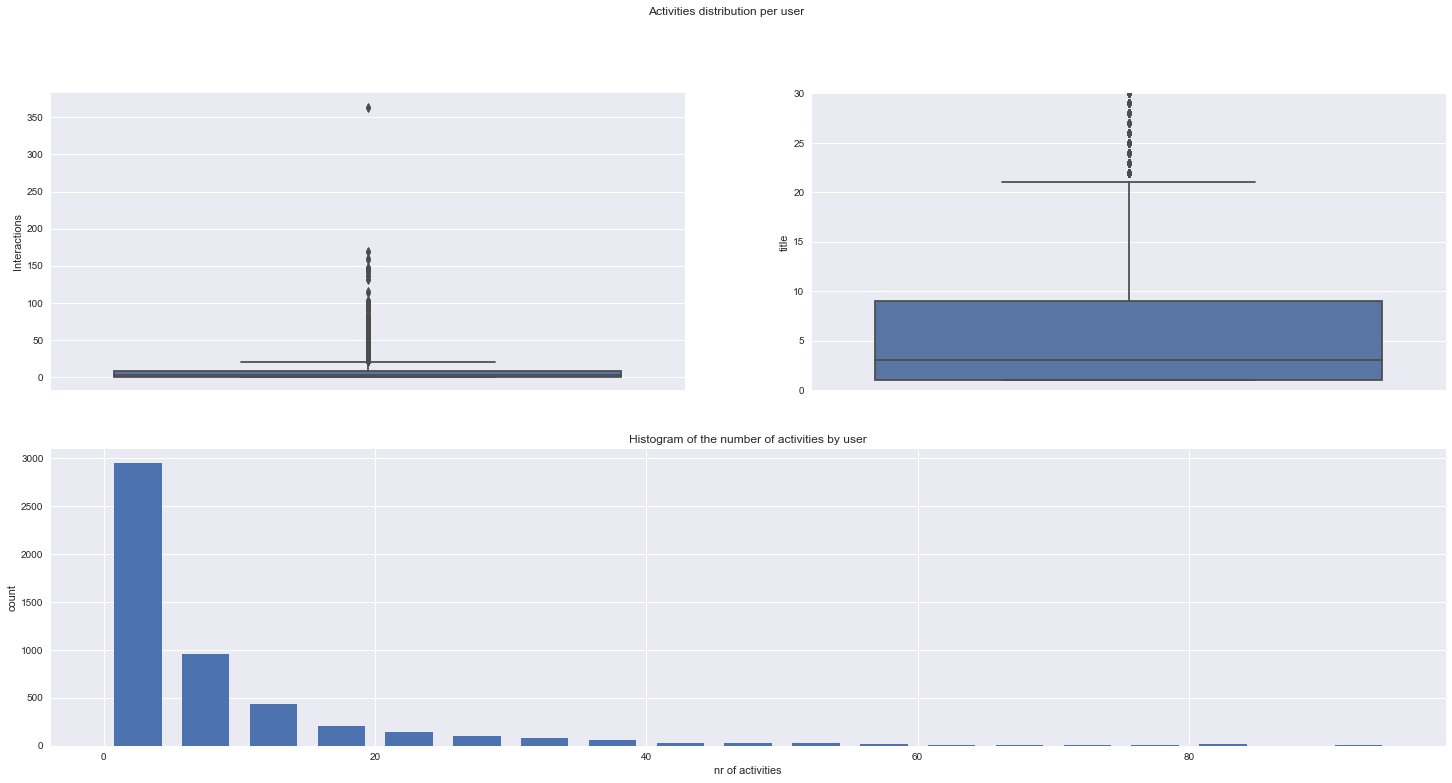

In [55]:
plt.figure(figsize=(25, 12))
plt.suptitle("Activities distribution per user")

plt.subplot(221)
sns.boxplot(y=df.groupby('user_id').title.count())
plt.ylabel('Interactions')

plt.subplot(222)
sns.boxplot(y=df.groupby('user_id').title.count())
plt.ylabel('Interactions')
plt.ylim(0, 30);

plt.subplot(212)
pu.plot_user_activities_histogram()

_Figure: boxplot of the activities in its full scale (top left) and an "enlargement" (top right).
<br>
The IQR is really small and the majority of the values is in a small interval, as shown in the histogram (bottom)_

### Most active users

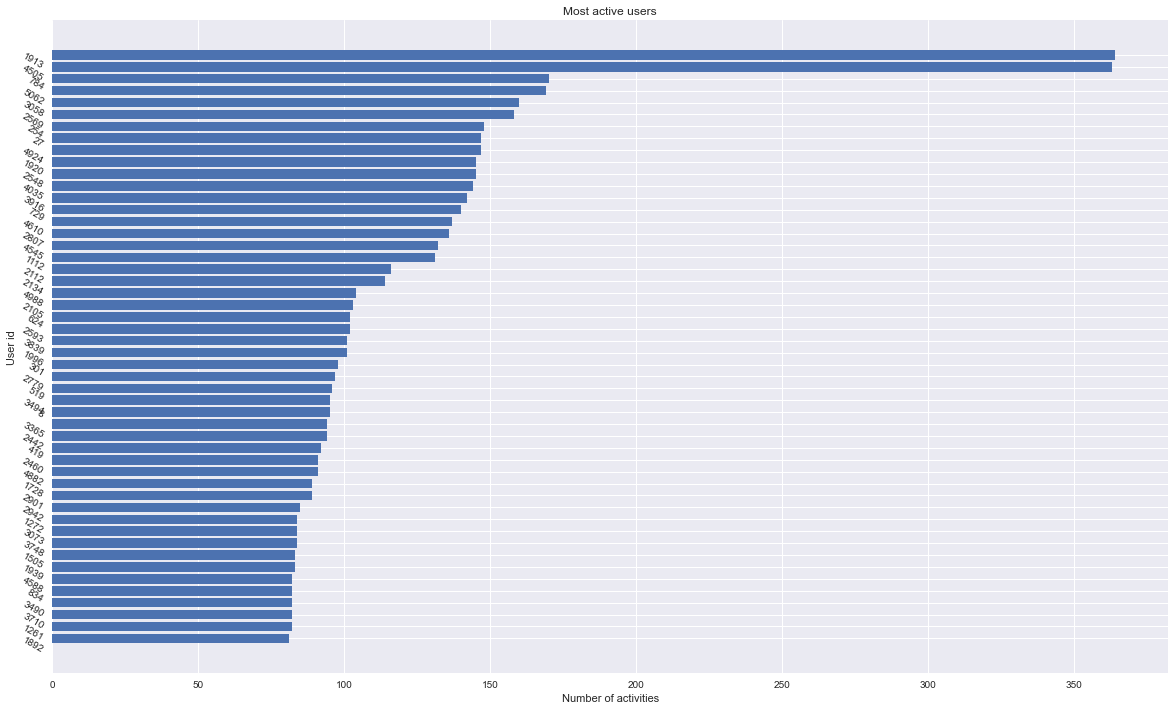

In [57]:
activ_args = fig_args.copy()
activ_args.update({'figsize': (20, 12)})
pu.plot_user_activities(**activ_args)
plt.title("Most active users");

_Figure: the most active users have a lot more interactions than the majority of other users_

## Reading per user
More or less, the same happes for the number of article read by the users.

In [68]:
user_matrix = u.user_matrix
article_read_per_user = user_matrix.sum(axis=1)
article_read_per_user.describe()

count    5148.000000
mean        6.540210
std         9.990676
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       135.000000
dtype: float64

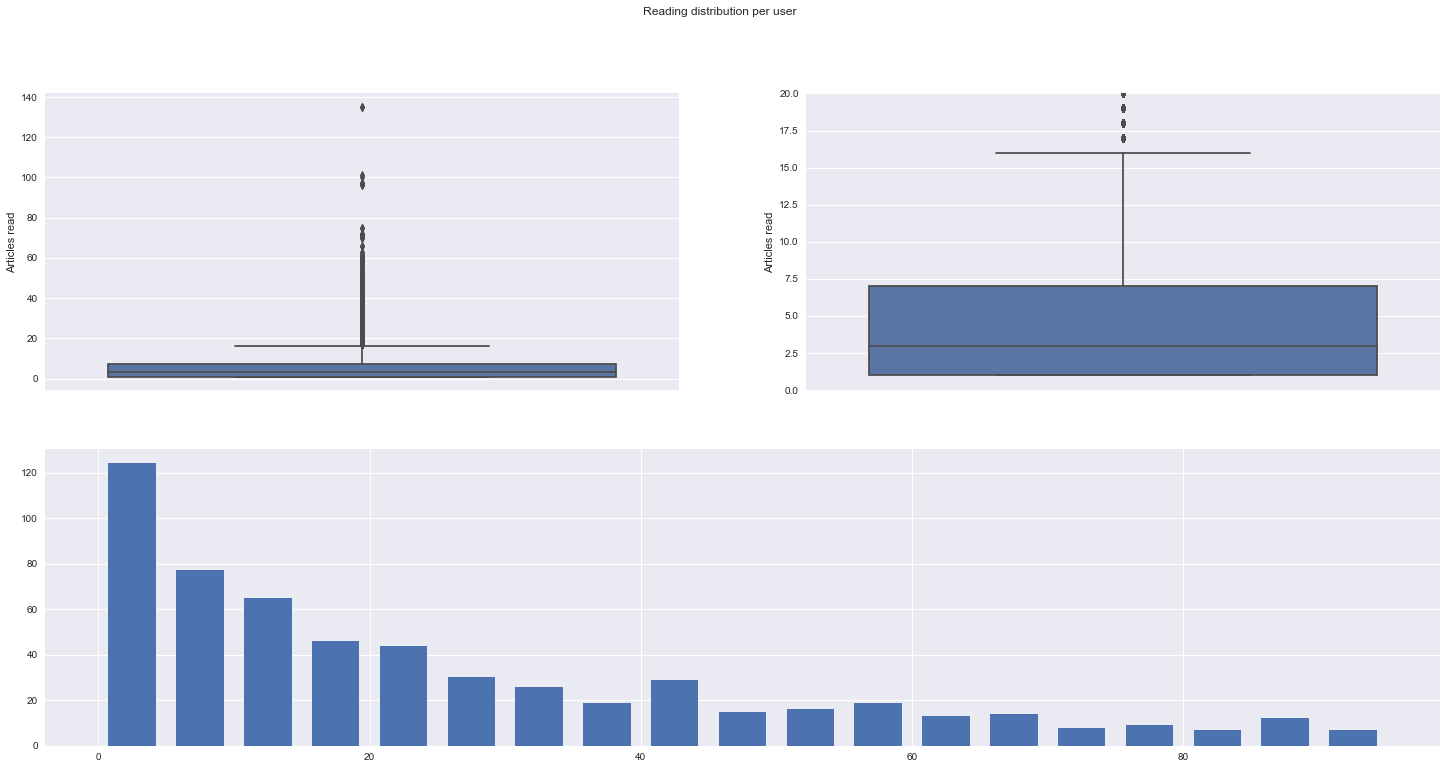

In [69]:
plt.figure(figsize=(25, 12))
plt.suptitle("Reading distribution per user")

plt.subplot(221)
sns.boxplot(y=article_read_per_user)
plt.ylabel('Articles read')

plt.subplot(222)
sns.boxplot(y=article_read_per_user)
plt.ylabel('Articles read')
plt.ylim(0, 20);

plt.subplot(212)
pu.plot_article_readings_histogram()

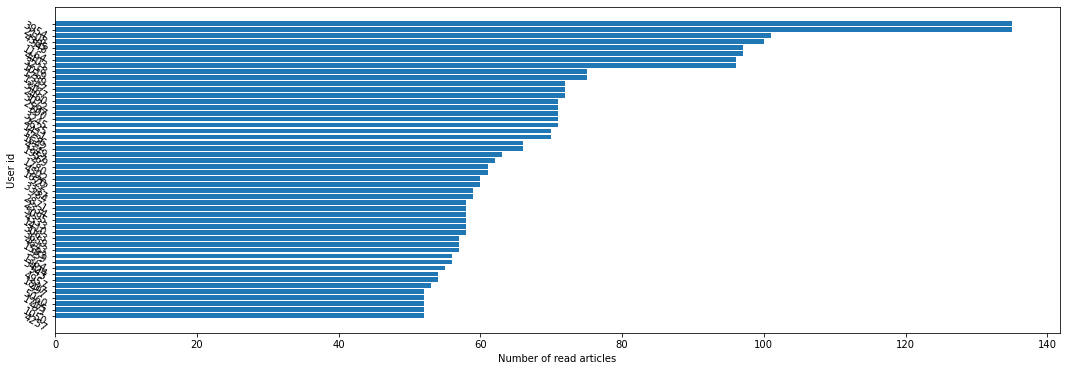

In [24]:
pu.plot_user_articles(**fig_args)